# Lab 7.06 - Time series analysis

In [12]:
# Package imports

# Package imports
# Package imports
# Package imports for data science and time series analysis in particular
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
import scipy.stats as stats                         # Statistical tests

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced dataviz

from sklearn.linear_model import LinearRegression   # Linear regression model

# Time series analysis
from datetime import datetime
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

## Exercise 6: COVID-19 data


In this lab assignment, we will make use of the COVID-19 dataset maintained by [Our World in Data](https://ourworldindata.org/coronavirus), published on Github at <https://github.com/owid/covid-19-data/tree/master/public/data>.

We took a snapshot of the data on 2023-05-31 that still contains *daily* observations. Recently, the dataset has been updated to only contain weekly observations.

First, we import the dataset, parse the `date` column as the Python `DateTime` type and set this as the index.

**Tip:** The CSV file is rather large, so instead you may want to load a local copy of the CSV file to avoid downloading it multiple times ('../data/owid-covid-data-2023-05-31.csv').

In [13]:
covid19 = pd.read_csv(
    'https://github.com/HoGentTIN/dsai-labs/raw/main/data/owid-covid-data-2023-05-31.csv',
    parse_dates=['date'],
    index_col=['date'])
covid19.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-04,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-05,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-06,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-07,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


Create a new `DataFrame` (with name e.g. `covid19_be`) that only contains the new cases in Belgium and use the `plot()` method of `DataFrame` to visualize it. Increase the size of the picture with the `figsize` parameter, otherwise it will be too small.

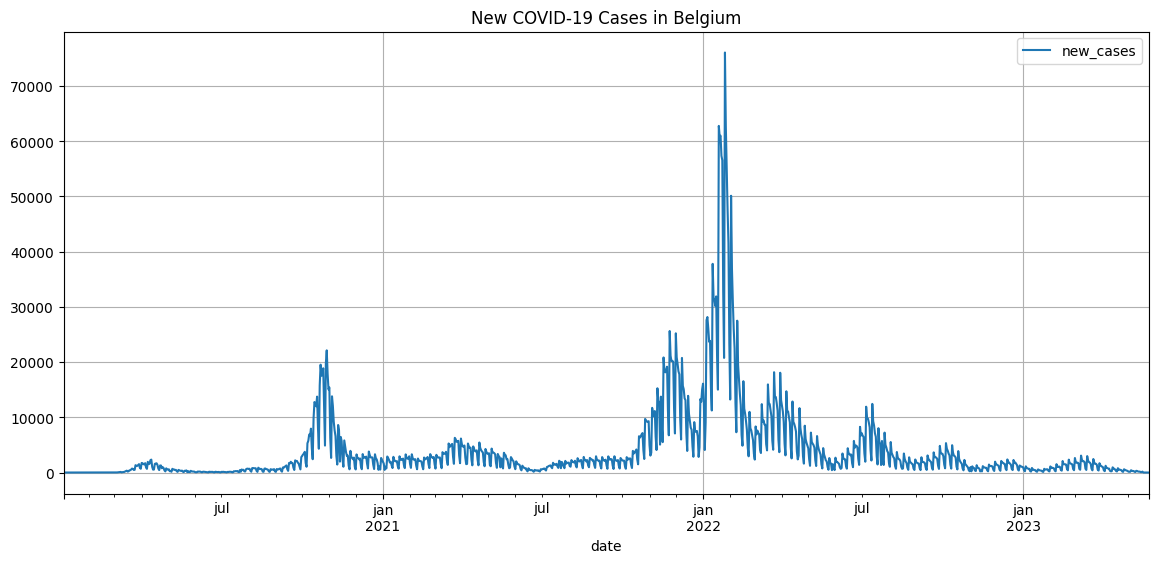

In [5]:
# Filter data voor België
covid19_be = covid19[covid19['location'] == 'Belgium'][['new_cases']].copy()

# Plot nieuwe besmettingen in België
covid19_be.plot(figsize=(14, 6), title="New COVID-19 Cases in Belgium")
plt.grid(True)
plt.show()

### Moving average

Add new columns to the data frame with new cases in Belgium with the simple moving average for 7 and 30 days. Plot the entire data frame (observations and both moving averages).

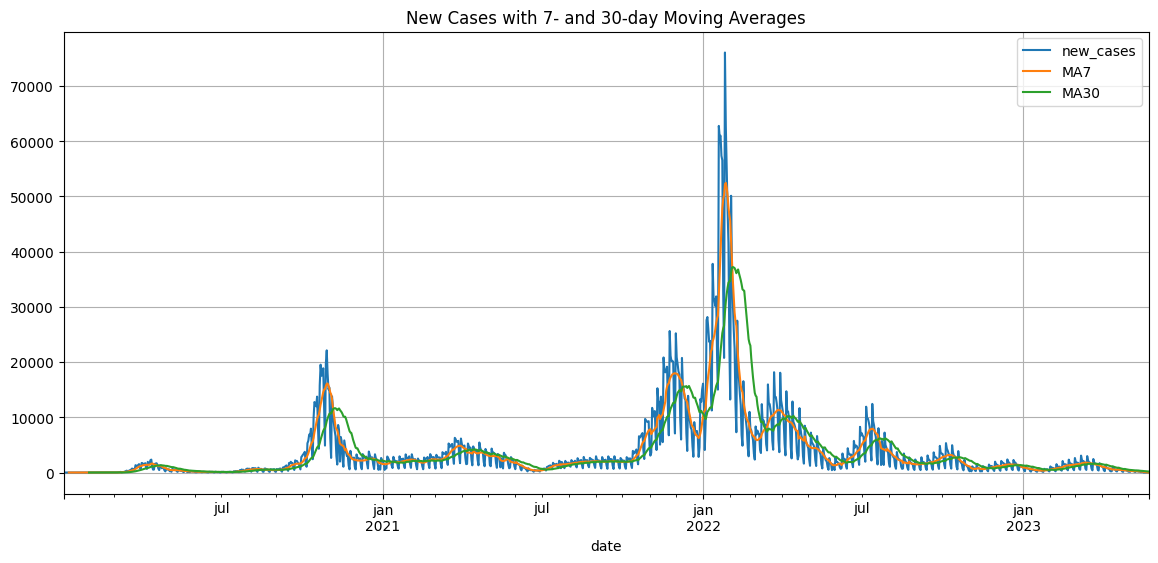

In [6]:
covid19_be['MA7'] = covid19_be['new_cases'].rolling(window=7).mean()
covid19_be['MA30'] = covid19_be['new_cases'].rolling(window=30).mean()

# Plot met moving averages
covid19_be.plot(figsize=(14, 6), title="New Cases with 7- and 30-day Moving Averages")
plt.grid(True)
plt.show()


### Holt-Winters model for new cases early 2021

The period from about December 2020 up to the end of February 2021 seems quite regular. Create a new `DataFrame` and select only the observations during that period (1 December 2020 to 28 February 2021). Plot the `DataFrame` (it will still contain the moving averages from the previous step).

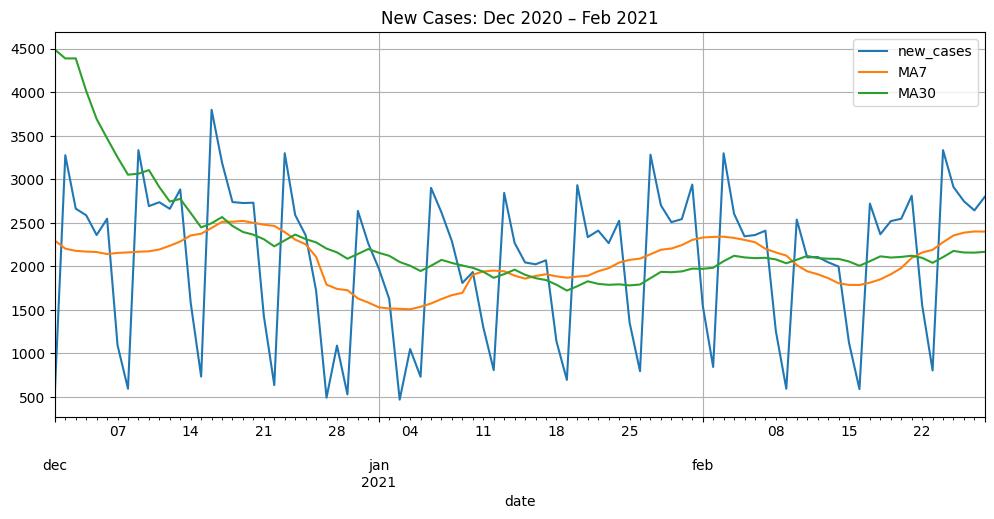

In [7]:
period = covid19_be['2020-12-01':'2021-02-28']

# Plot subset
period.plot(figsize=(12, 5), title="New Cases: Dec 2020 – Feb 2021")
plt.grid(True)
plt.show()




Build a Holt-Winters model for the observed new cases during that period.

Use the additive type for both trend and seasonal smoothing. Set the value for `seasonal_periods` to the appropriate value! Plot the observed and fitted values.

c:\Users\Jamie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jamie\AppData\Local\Temp\ipykernel_9768\2901656230.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period['fitted'] = model_hw.fittedvalues


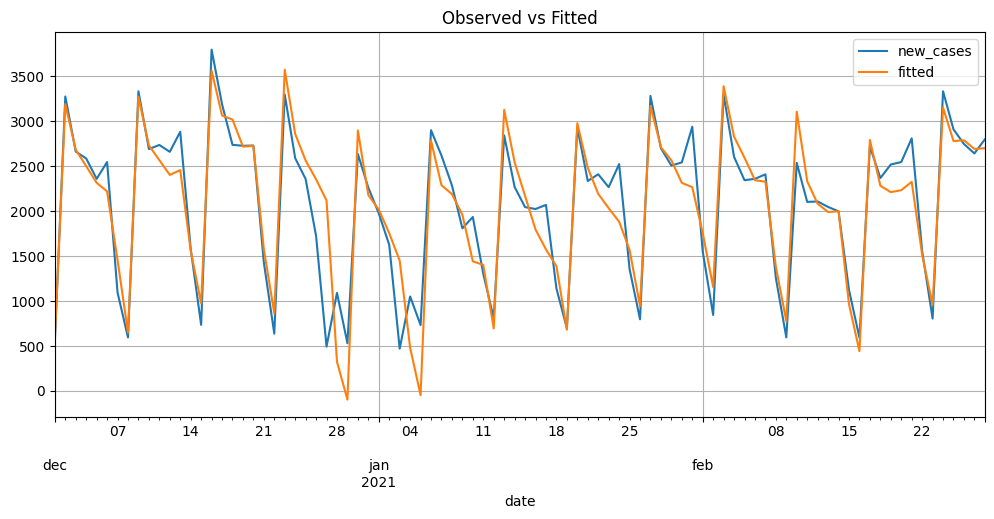

In [8]:
model_hw = ExponentialSmoothing(
    period['new_cases'],
    trend='add',
    seasonal='add',
    seasonal_periods=7
).fit()

# Plot fitted values
period['fitted'] = model_hw.fittedvalues
period[['new_cases', 'fitted']].plot(figsize=(12, 5), title="Observed vs Fitted")
plt.grid(True)
plt.show()


Now, make a forecast for 21 days and plot observed and forecasted values. What do you notice when you compare observed and forecasted values as time progresses?

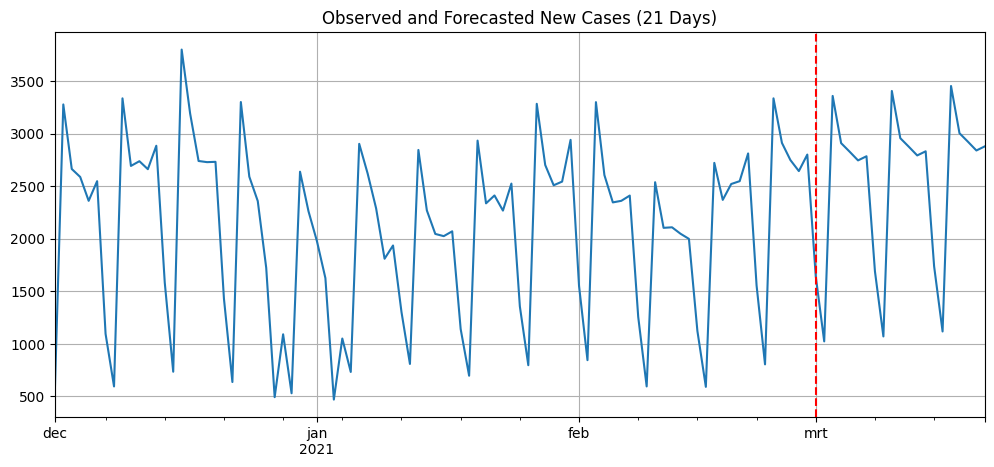

In [11]:
forecast_hw = model_hw.forecast(21)

# Combineer data voor plot
full_plot = pd.concat([period['new_cases'], forecast_hw], axis=0)
full_plot.plot(figsize=(12, 5), title="Observed and Forecasted New Cases (21 Days)")
plt.axvline(x='2021-03-01', color='red', linestyle='--')
plt.grid(True)
plt.show()


### Evaluating model quality


- Calculate the Mean Squared Error for a forecast period of 7 days, and compare its square root with the standard deviation of observed new cases over the test period and forecasted period combined.
- Do the same for a forecast period of 14 and 21 days.
- For which period is the quality of the forecast ok?

The expected results are shown in the table below:

|     Forecast period      |         MSE |     √MSE |    stdev |
| :----------------------: | ----------: | -------: | -------: |
| 2021-03-01 to 2021-03-07 |   25408.902 |  159.402 |  855.684 |
| 2021-03-01 to 2021-03-14 |  154280.817 |  392.786 |  895.531 |
| 2021-03-01 to 2021-03-21 | 1048835.781 | 1024.127 | 1052.978 |

In [10]:
def evaluate_forecast(start, end):
    y_true = covid19_be.loc[start:end, 'new_cases']
    y_pred = forecast_hw.loc[start:end]
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    stdev = np.std(pd.concat([y_true, y_pred]))
    return mse, rmse, stdev

print("7 dagen:", evaluate_forecast('2021-03-01', '2021-03-07'))
print("14 dagen:", evaluate_forecast('2021-03-01', '2021-03-14'))
print("21 dagen:", evaluate_forecast('2021-03-01', '2021-03-21'))


7 dagen: (25408.90161016752, np.float64(159.40169889360502), np.float64(796.5746929972504))
14 dagen: (154280.81707120585, np.float64(392.78596852637935), np.float64(896.0615319523066))
21 dagen: (1048835.7806246676, np.float64(1024.1268381527102), np.float64(1147.072870677296))


### ICU patients

Create a new `DataFrame` with only the total number of ICU (intensive care units) patients in the Belgian hospitals. Make sure that all NaN's are removed, since time series analysis functions can't cope with missing values. Plot this time series. 

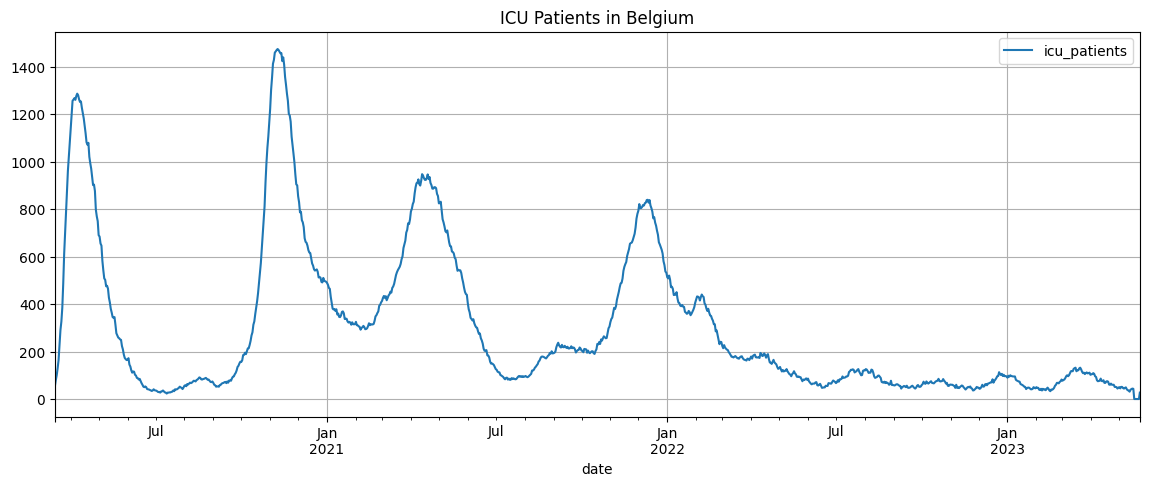

c:\Users\sweme\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


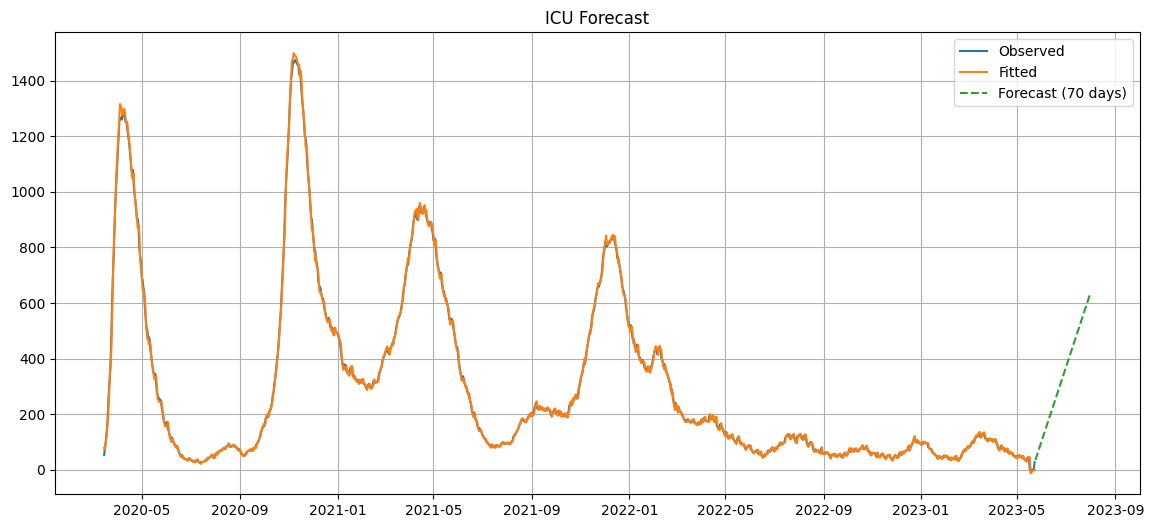

Alpha: 0.95846630905084
Beta : 0.37302331730761334
Final level: 25.812017848051326
Final trend: 8.731486265902678


C:\Users\sweme\AppData\Local\Temp\ipykernel_10564\3038814850.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Final level:", holt_model.level[-1])
C:\Users\sweme\AppData\Local\Temp\ipykernel_10564\3038814850.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Final trend:", holt_model.trend[-1])


In [ ]:
icu = covid19_be = covid19[covid19['location'] == 'Belgium'][['icu_patients']].dropna()

# Plot ICU-patiënten
icu.plot(figsize=(14, 5), title="ICU Patients in Belgium")
plt.grid(True)
plt.show()





# Parameters bekijken
print("Alpha:", holt_model.model.params['smoothing_level'])
print("Beta :", holt_model.model.params['smoothing_trend'])
print("Final level:", holt_model.level[-1])







Build a duible exponential smoothing (Holt) model of this time series. Make a forecast of 70 time units and plot the observations, fitted values and forecast.

Are we currently in an upward or downward trend, according to this model? Do the forecasted values seem reasonable if you look at the last period?

c:\Users\sweme\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


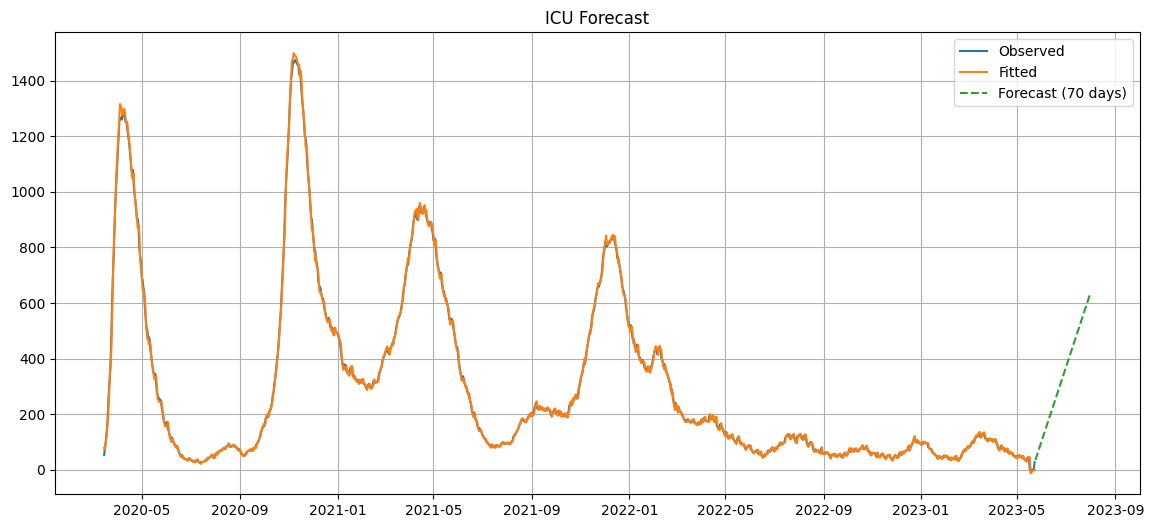

In [14]:
# Holt-model (default alpha, beta)
holt_model = Holt(icu).fit()
holt_forecast = holt_model.forecast(70)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(icu, label='Observed')
plt.plot(holt_model.fittedvalues, label='Fitted')
plt.plot(holt_forecast, label='Forecast (70 days)', linestyle='--')
plt.title("ICU Forecast")
plt.legend()
plt.grid(True)
plt.show()

Since we didn't set any initial parameters like $\alpha$ and $\beta$, the model calculated them using some rule of thumb. List these parameters from the model:

In [15]:
print("Final trend:", holt_model.trend[-1])

Final trend: 8.731486265902678


C:\Users\sweme\AppData\Local\Temp\ipykernel_10564\3495343880.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Final trend:", holt_model.trend[-1])


What were the final estimated values for the level and trend, that are used in the forecast? In other words, what are the parameters of the line that estimates future observations?

In [16]:
print("Final level:", holt_model.level[-1])
print("Final trend:", holt_model.trend[-1])


Final level: 25.812017848051326
Final trend: 8.731486265902678


C:\Users\sweme\AppData\Local\Temp\ipykernel_10564\3740076710.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Final level:", holt_model.level[-1])
C:\Users\sweme\AppData\Local\Temp\ipykernel_10564\3740076710.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Final trend:", holt_model.trend[-1])


Let's try to set the parameters ourselves. Recreate the Holt-model with $\alpha = \beta = 0.1$. Calculate a forecast like before and plot.

| Parameter         | Symbool in de formules | Functie in het model                   |
| ----------------- | ---------------------- | -------------------------------------- |
| `smoothing_level` | **α (alpha)**          | Hoe snel het model het niveau bijstelt |
| `smoothing_trend` | **β (beta)**           | Hoe snel het model de trend bijstelt   |


c:\Users\sweme\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\sweme\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


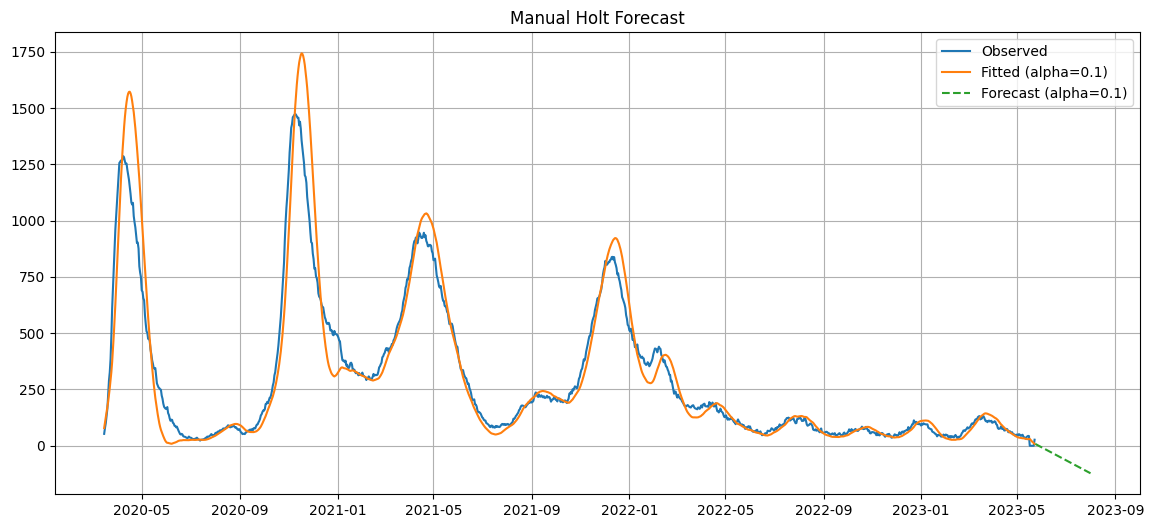

In [17]:
holt_manual = Holt(icu).fit(smoothing_level=0.1, smoothing_trend=0.1)
forecast_manual = holt_manual.forecast(70)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(icu, label='Observed')
plt.plot(holt_manual.fittedvalues, label='Fitted (alpha=0.1)')
plt.plot(forecast_manual, label='Forecast (alpha=0.1)', linestyle='--')
plt.title("Manual Holt Forecast")
plt.legend()
plt.grid(True)
plt.show()



Compare the model parameters and final estimates. Which of the two forecast models seems to perform best if you look at the plots?

In [18]:
# Vergelijk parameters
print("Manual model level:", holt_manual.level[-1])
print("Manual model trend:", holt_manual.trend[-1])

Manual model level: 9.91537669812055
Manual model trend: -1.8855731983284


C:\Users\sweme\AppData\Local\Temp\ipykernel_10564\3952483540.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Manual model level:", holt_manual.level[-1])
C:\Users\sweme\AppData\Local\Temp\ipykernel_10564\3952483540.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Manual model trend:", holt_manual.trend[-1])


| Je gebruikt...              | Als je...                                     |
| --------------------------- | --------------------------------------------- |
| `SimpleExpSmoothing(...)`   | géén trend of seizoen hebt (alleen "vlak")    |
| `Holt(...)`                 | **wel** een trend hebt, maar **geen seizoen** |
| `ExponentialSmoothing(...)` | **trend én seizoenspatroon** hebt             |




---

##  Stap 1: Laad de dataset
Gebruik `parse_dates=['date']` en stel `date` als index in. Filter enkel België.

---

##  Stap 2: Visualiseer de nieuwe besmettingen
Zoek naar patronen zoals trend of seizoen.

---

##  Stap 3: Voeg moving averages toe
Gebruik `rolling().mean()` om 7- en 30-daagse gemiddelden toe te voegen.

---

##  Stap 4: Selecteer subset voor model
Kies periode 1 dec 2020 – 28 feb 2021. Deze is relatief stabiel.

---

##  Stap 5: Bouw Holt-Winters model
Gebruik `trend='add'`, `seasonal='add'`, `seasonal_periods=7` (dagelijkse data).

---

##  Stap 6: Voorspel 21 dagen vooruit
Gebruik `.forecast(21)` en plot dit samen met observaties.

---

##  Stap 7: Modelkwaliteit evalueren
Bereken:
- **MSE**
- **√MSE**
- **Standaarddeviatie**  
Voor periodes van 7, 14 en 21 dagen → vergelijk nauwkeurigheid.

---

##  Stap 8: ICU data analyseren
- Filter kolom `icu_patients`
- Verwijder `NaN`
- Pas Holt toe (met en zonder zelfgekozen alpha/beta)
- Bekijk trend en niveau

---

##  Stap 9: Analyseer de parameters
- Hoe groot is de trend?
- Welke voorspelling lijkt realistischer op de grafiek?




---

##  Moving Average
Een methode om ruis weg te filteren.  
Bijvoorbeeld: een 7-daags gemiddelde is het gemiddelde van vandaag en de 6 dagen ervoor.

---

##  Holt-Winters Model
Gebruikt:
- **Level**: huidig gemiddelde
- **Trend**: richting (stijgend/dalend)
- **Seasonality**: patroon dat zich herhaalt (bijv. wekelijks)

---

##  MSE en √MSE
- MSE: gemiddelde kwadratische fout tussen voorspelling en observatie
- √MSE: gemakkelijker te vergelijken met standaarddeviatie
→ Kleinere √MSE dan stdev? Dan is het model **bruikbaar**

---

##  Holt-model
Een eenvoudiger model zonder seizoenscomponent, enkel **niveau + trend**.

---

##  Parameters alpha en beta
- **α (smoothing level)**: hoe snel het model nieuwe observaties volgt
- **β (trend smoothing)**: hoe snel de trend bijgestuurd wordt

